Scikit-Learn provides a package of built-in functions to fetch datasets commonly used by the machine learning community.

https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset

(a) Download the above dataset using sklearn.datasets.fetch_california_housing function.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from math import sqrt, sin, cos, radians

In [ ]:
housing = datasets.fetch_california_housing()

(b) From the downloaded dataset, examine the features and define a pandas DataFrame to hold the district records as rows. Add the target median housing price as a new column in the data frame. The shape of the data frame should be (20640, 9).

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
housing_df['MedianPrice'] = housing.target

In [ ]:
housing_df.shape

(20640, 9)

In [ ]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianPrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


(c) Plot a histogram for each attribute in the data frame. Use bins=100.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37031ab610>,
      dtype=object)

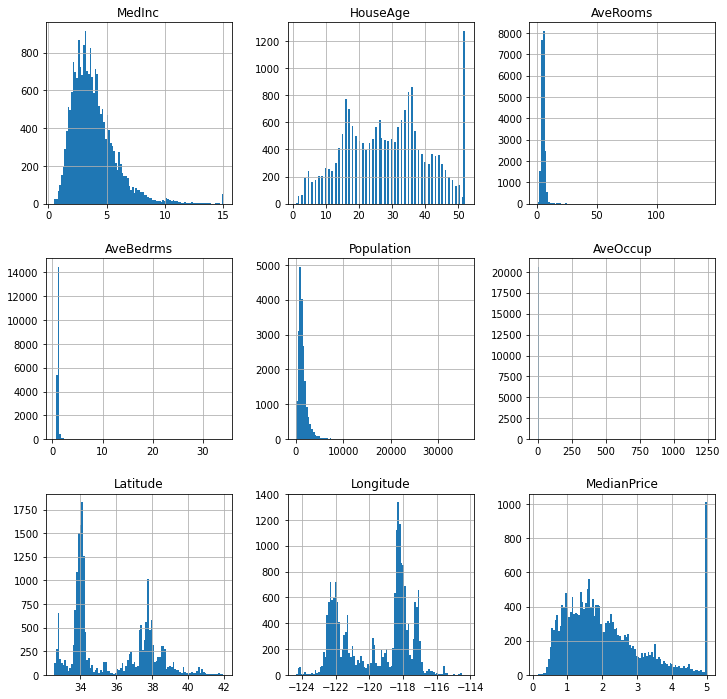

In [ ]:
import matplotlib.pyplot as plt
housing_df.hist(figsize=(12, 12), bins=100)

(d) Plot a scatter diagram to show the location (latitude-longitude) of the districts in the records. Use the median housing price as a scale to color the points in the plot. 

Seaborn

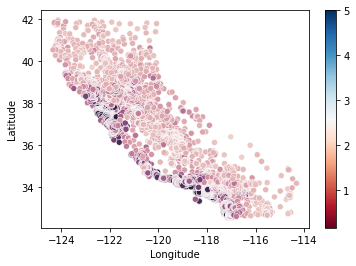

In [ ]:
import seaborn as sns
ax = sns.scatterplot(data=housing_df, x="Longitude", y="Latitude", hue="MedianPrice")
norm = plt.Normalize(housing_df['MedianPrice'].min(), housing_df['MedianPrice'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()

Matplotlib

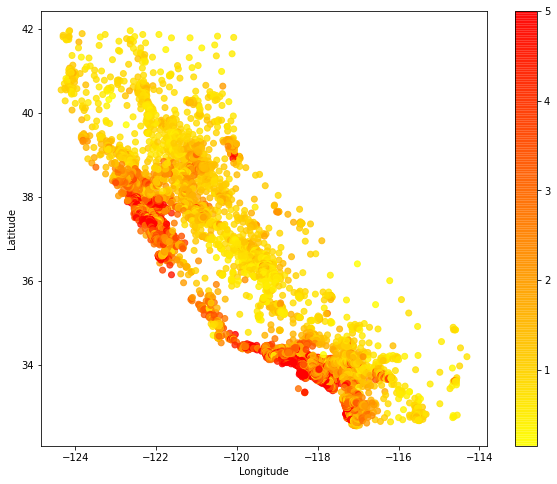

In [ ]:
plt.figure(figsize=(10, 8))
#plot the data with housing price as scale to color the points
plt.scatter(housing_df['Longitude'],housing_df['Latitude'],
            cmap = 'autumn_r', c = housing_df['MedianPrice'],
            alpha = 0.8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show();

(e) Write a function to return the distance between two points where the function inputs are the latitude and longitude of the two points.

In [ ]:
# import math

# def degree_conversion(value):
#   return value*111/6378.137

# def distance(lat1, lat2, log1, log2):
#   lat1 = degree_conversion(lat1)
#   lat2 = degree_conversion(lat2)
#   log1 = degree_conversion(log1)
#   log2 = degree_conversion(log2)
#   𝑟 =6378.137
#   distance = 2*r* np.arcsin(math.sqrt(math.sin((lat2-lat1)/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin((log2-log1)/2)**2))
#   return distance

In [ ]:
def distance(point1, point2):
  '''
  Calculate the distance between two points based on distance formula in https://en.wikipedia.org/wiki/Haversine_formula

  Outputs:
    distance : The distance(km) between two points
  '''
  point1_lat, point1_long = point1
  point2_lat, point2_long = point2
  #radius of the Earth
  r = 6378.137
  #convert the degree into radians
  phi_1, phi_2 = radians(point1_lat), radians(point2_lat)
  lambda_1, lambda_2 = radians(point1_long),radians(point2_long)
  #compute the inside square root
  inside_sqrt = sin((phi_2-phi_1)/2)**2 + cos(phi_1)*cos(phi_2)*sin((lambda_2 - lambda_1)/2)**2
  #put all pieces together
  distance = 2 * r * np.arcsin(np.sqrt(inside_sqrt))
  return distance

In [ ]:
#An examination: distance from LA to SF
distance((33.93, -118.40), (37.62, -122.38))

545.7177050542751

(f) For each city given in figure 1, compute the distance of the California districts from the city using your function in (e).

In [ ]:
#create a dataframe that contains the logitude and latitude of cities given in figure 1
data = {'Lat':[33.93, 37.62, 37.37, 32.57, 34.43],
        'Lon':[-118.40, -122.38, -121.92, -116.98, -119.83]}
cities_degree = pd.DataFrame(data, index=['LA', 'SF', 'SJ', 'SD', 'SB'])
# cities_degree = pd.DataFrame(data)
cities_degree

,Lat,Lon
LA,33.93,-118.40
SF,37.62,-122.38
SJ,37.37,-121.92
SD,32.57,-116.98
SB,34.43,-119.83


In [ ]:
type(housing_df)

pandas.core.frame.DataFrame

In [ ]:
dis = dict({})
#use a for loop to generate a new dataframe 
# for i in range(len(housing_df)):
#   for j in range(len(cities_degree)):
#     dis.append(distance(housing_df.loc[i,'Latitude'], cities_degree.loc[j, 'Lat'],
#                         housing_df.loc[i, 'Longitude'], cities_degree.loc[j, 'Lon']))

for city in cities_degree.index:
  #get the city point from cities_degree
  city_point = tuple(cities_degree.loc[city, ['Lat', 'Lon']])
  #print(city_point)
  #apply distance on city_point and housing_df to calculate the distances
  housing_city_dis = housing_df.apply(lambda point: distance(city_point, (point.Latitude, point.Longitude)), axis=1)
  #print(housing_city_dis)
  #organize housing_city_dis into list, dis
  dis['Dist_'+city] = housing_city_dis

In [ ]:
dis = pd.DataFrame(dis)
dis

,Dist_LA,Dist_SF,Dist_SJ,Dist_SD,Dist_SB
0,558.991206,31.812202,63.009434,759.520447,440.444012
1,556.711996,30.202092,60.622766,757.256759,438.076878
2,556.969960,28.415626,60.427152,757.555834,437.999744
3,557.530446,28.044991,60.843965,758.129266,438.444738
4,557.530446,28.044991,60.843965,758.129266,438.444738
...,...,...,...,...,...
20635,662.735036,235.543438,245.781031,853.326186,573.209050
20636,667.705841,231.742740,243.981377,859.036506,576.473599
20637,661.896886,225.390090,237.307751,853.522833,570.152128
20638,665.336295,221.624391,235.214519,857.575916,572.145055


(g) Now that you have (f), add a column (with label ‘CityProximity’) to the data frame in part (b) where each number in the column represents the shortest distance of the corresponding district to the given cities in figure 1.

In [ ]:
# shortest_dis = []
# temp = []
# while(dis!=[]):
#   for i in range(5):
#     temp.append(dis.pop(0))
#   shortest_dis.append(min(temp))

In [ ]:
# shortest_dis[0:2]

[31.728894424216165, 30.124988471759767]

In [ ]:
housing_df['CityProximity']=dis.min(axis=1)

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianPrice,CityProximity
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,31.812202
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,30.202092
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,28.415626
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,28.044991
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,28.044991


(h) From the data frame prepared in (g), create a new data frame where the median housing price is less than 5.0 and median house age is less than 52.0.

In [ ]:
housing_df1 = housing_df[housing_df['MedianPrice']<5]
housing_df1 = housing_df[housing_df['HouseAge']<52]

In [ ]:
len(housing_df1)

19367

(i) Split the data frame in (h) into a training and test dataset. Use the first 14000 rows as the training dataset and the rest as the test dataset. Split the target dataset in the same manner. (Note that the data frame in (h) has the target median housing price column which should be removed in the training set)

In [ ]:
# X = housing_df1[{'AveBedrms', 'MedInc', 'HouseAge', 'AveRooms', 'Population', 
                      #  'AveOccup', 'Latitude', 'Longitude', 'CityProximity'}]
X = housing_df1.drop('median_housing_px',axis=1)
X_train = X[:14000]
X_train.shape

(14000, 9)

In [ ]:
X_test = X[14000:]
X_test.shape

(5367, 9)

In [ ]:
Y = housing_df1['MedianPrice']
Y_train = Y[:14000]
Y_train.shape

(14000,)

In [ ]:
Y_test = Y[14000:]
Y_test.shape

(5367,)

(j) Use RandomForestRegressor (with 20 estimators) in Scikit-Learn to fit a random forest on the training dataset. Use cross_val_score to compute the average of the root mean squared error (RMSE) on the 5-fold cross-validation.

A standard way to evaluate model accuracy on continuous data is to compare the mean squared error (MSE) of your candidate models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=20)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_scores.mean()

-0.6392572036215326

(k) Use GridSearchCV (with 5-fold cross-validation) to fine tune the hyper-parameters of the Random Forest Regressor model. (You may choose the upper bound for n_estimators to be 50)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[10, 20, 30, 40, 50]}
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=20),
             param_grid={'n_estimators': [10, 20, 30, 40, 50]})

In [ ]:
gs.best_params_

{'n_estimators': 50}

In [ ]:
best_model = gs.best_estimator_

(l) Evaluate the RMSE of the fine-tuned model on the test dataset.

In [ ]:
best_model.fit(X_test, Y_test)

RandomForestRegressor(n_estimators=50)

In [ ]:
cv_scores = cross_val_score(best_model, X_test, Y_test, cv=5, scoring='neg_root_mean_squared_error')
cv_scores.mean()

-0.7483414371086954